In [1]:
# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Carregar o dataset Iris
df = pd.read_csv("app/atividade_5/data/diabetes.csv")

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [3]:
# Separar preditores e alvo
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [4]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
# Treinar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # você pode ajustar n_neighbors (prof = 3)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # probabilidade da classe "1" (Diabetes)

In [6]:
# AUC-ROC (como é binário, podemos calcular diretamente)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred, average="weighted")
# Recall
recall = recall_score(y_test, y_pred, average="weighted")
# F1-Score
f1 = f1_score(y_test, y_pred, average="weighted")

# Exibir resultados
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

AUC-ROC Score: 0.7162
Acurácia: 0.6883
Precisão: 0.6902
Recall: 0.6883
F1-Score: 0.6892


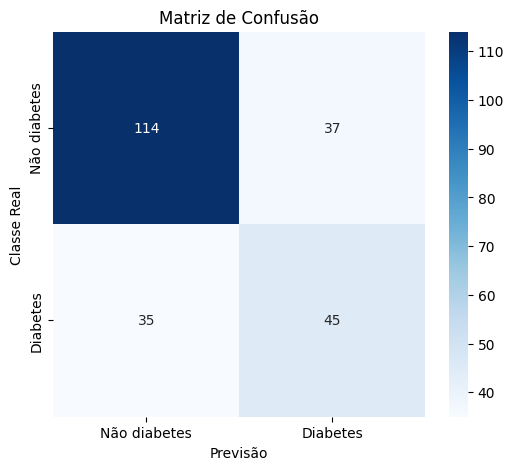

In [7]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Não diabetes", "Diabetes"],
    yticklabels=["Não diabetes", "Diabetes"],
)
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Classe Real")
plt.show()

In [8]:
cm

array([[114,  37],
       [ 35,  45]])